In [1]:
from matplotlib import pyplot as plt
import cv2

In [2]:
from imutils.perspective import four_point_transform
from skimage.segmentation import clear_border
import numpy as np
import imutils
import cv2


In [3]:
from skimage.morphology import remove_small_objects

In [4]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import os
from tensorflow.keras import backend as K


In [5]:
image = 'Photos/20200829_192717.jpg'
# image = 'Photos/Screenshot 2020-09-09 at 17.34.16.png'
im = cv2.imread(image)

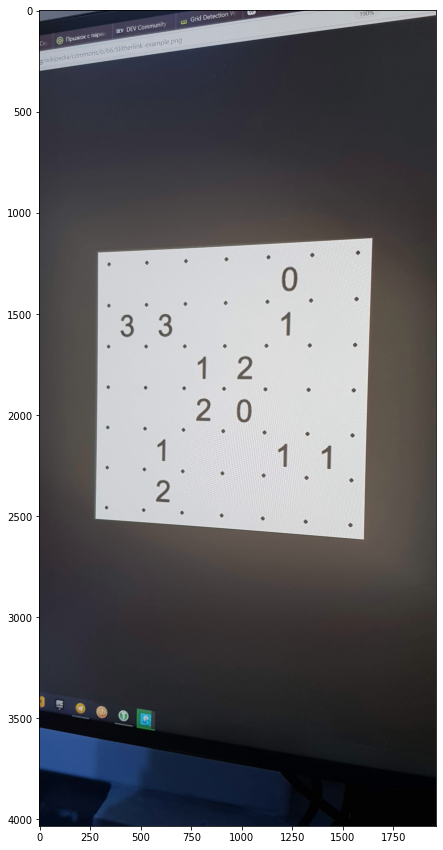

In [6]:
plt.figure(figsize=(15,15))
plt.imshow(im)

In [7]:
im.shape

(4032, 1960, 3)

In [8]:

def find_puzzle(image, debug=False):
    # convert the image to grayscale and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (41, 41), 4)
        # apply adaptive thresholding and then invert the threshold map
    thresh = cv2.adaptiveThreshold(
        blurred, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )
    thresh = cv2.bitwise_not(thresh)
    # check to see if we are visualizing each step of the image
    # processing pipeline (in this case, thresholding)
    if debug: 
        print_img(thresh)
    dilated = cv2.dilate(thresh, kernel = np.ones((5,5),np.uint8), iterations=4)
    if debug: 
        print_img(dilated)
    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    # initialize a contour that corresponds to the puzzle outline
    puzzleCnt = []
    # loop over the contours
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        # if our approximated contour has four points, then we can
        # assume we have found the outline of the puzzle
        if len(approx) == 4:
            puzzleCnt.append(approx)
            break
        # if the puzzle contour is empty then our script could not find
    # the outline of the Sudoku puzzle so raise an error
    if puzzleCnt is None:
        raise Exception(("Could not find Sudoku puzzle outline. "
            "Try debugging your thresholding and contour steps."))
    # check to see if we are visualizing the outline of the detected
    # Sudoku puzzle
    if debug:
        # draw the contour of the puzzle on the image and then display
        # it to our screen for visualization/debugging purposes
        output = image.copy()
        cv2.drawContours(output, puzzleCnt, -1, (0, 255, 0), 2)
        print_img(output)
    puzzle = four_point_transform(image, puzzleCnt[0].reshape(4, 2))
    warped = four_point_transform(gray, puzzleCnt[0].reshape(4, 2))
    if debug:
        print_img(warped)
    return puzzle, warped

In [9]:
def print_img(im, figsize=(15,15)):
    plt.figure(figsize=figsize)
    plt.imshow(im, cmap='gray')

(array([[[ 85,  81,  80],
         [ 85,  81,  80],
         [ 85,  81,  80],
         ...,
         [ 72,  62,  62],
         [ 72,  62,  62],
         [ 72,  62,  62]],
 
        [[ 85,  81,  80],
         [ 85,  81,  80],
         [ 85,  81,  80],
         ...,
         [ 75,  65,  65],
         [ 75,  65,  65],
         [ 74,  64,  64]],
 
        [[ 85,  81,  80],
         [ 85,  81,  80],
         [ 85,  81,  80],
         ...,
         [ 75,  65,  65],
         [ 75,  65,  65],
         [ 74,  64,  64]],
 
        ...,
 
        [[ 76,  68,  68],
         [ 75,  68,  68],
         [ 75,  68,  68],
         ...,
         [102,  90,  80],
         [101,  89,  79],
         [101,  89,  79]],
 
        [[ 74,  69,  68],
         [ 74,  69,  68],
         [ 74,  69,  68],
         ...,
         [102,  90,  80],
         [101,  89,  79],
         [101,  89,  79]],
 
        [[ 73,  67,  68],
         [ 73,  67,  68],
         [ 73,  67,  68],
         ...,
         [101,  87,  81],
  

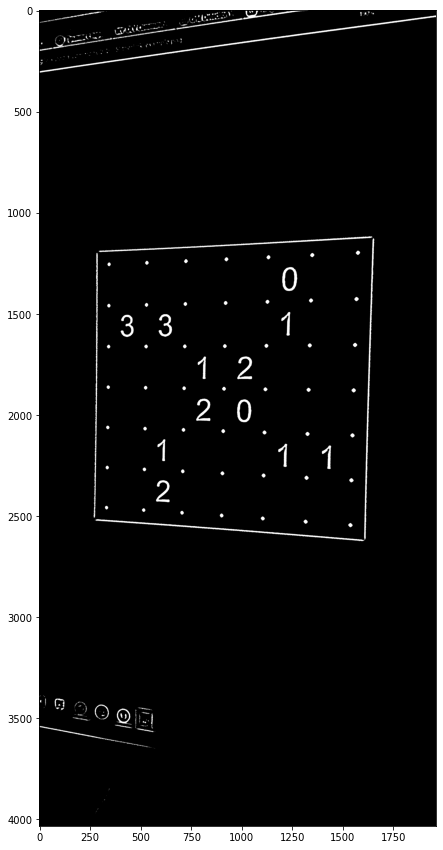

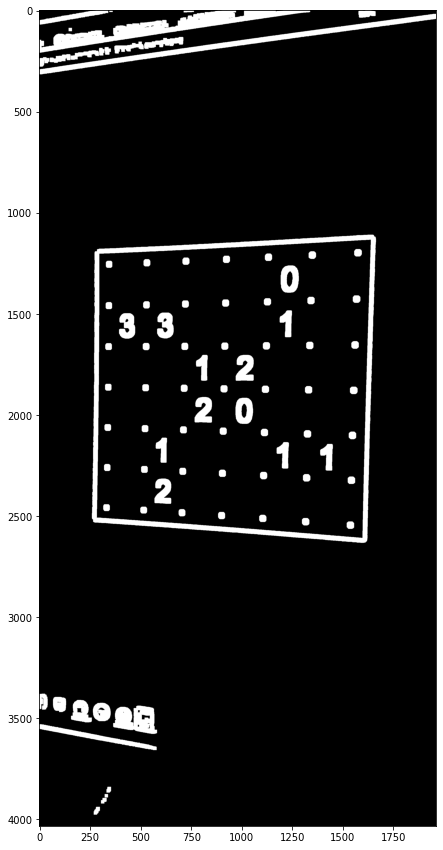

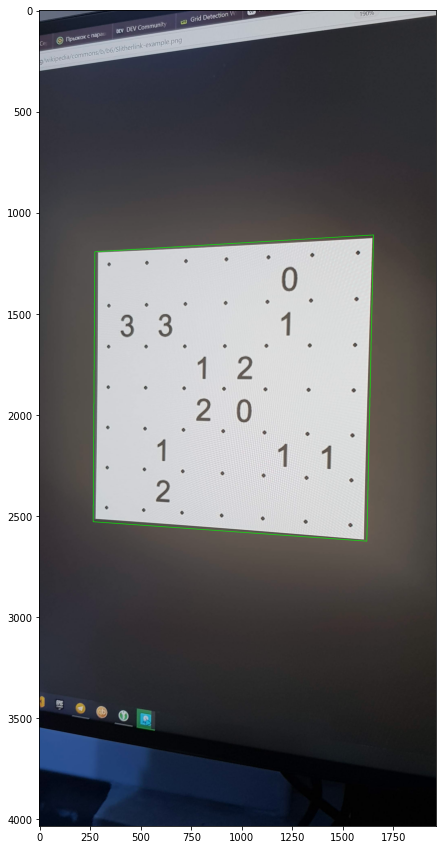

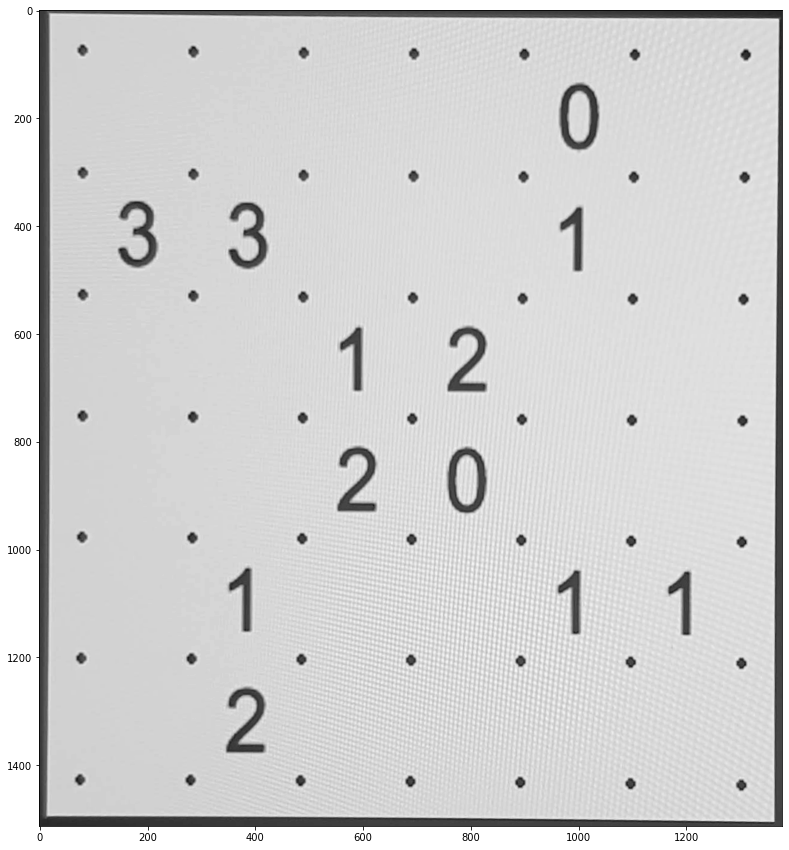

In [10]:
find_puzzle(im, debug=True)

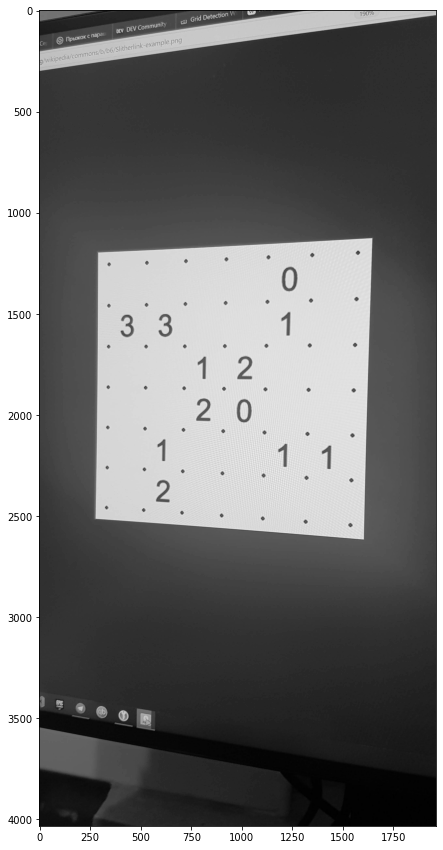

In [11]:
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
print_img(gray)

In [12]:
cv2.GaussianBlur?

Docstring:
GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
.   @brief Blurs an image using a Gaussian filter.
.   
.   The function convolves the source image with the specified Gaussian kernel. In-place filtering is
.   supported.
.   
.   @param src input image; the image can have any number of channels, which are processed
.   independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
.   @param dst output image of the same size and type as src.
.   @param ksize Gaussian kernel size. ksize.width and ksize.height can differ but they both must be
.   positive and odd. Or, they can be zero's and then they are computed from sigma.
.   @param sigmaX Gaussian kernel standard deviation in X direction.
.   @param sigmaY Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be
.   equal to sigmaX, if both sigmas are zeros, they are computed from ksize.width and ksize.height,
.   respectively (see #getGaussianKernel for 

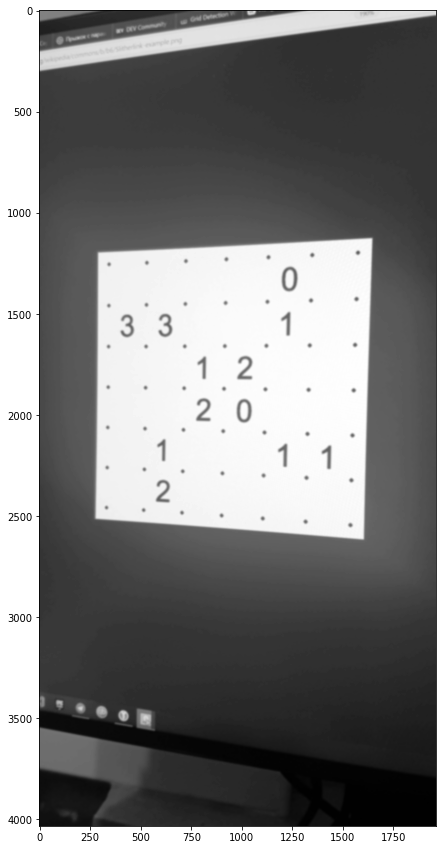

In [13]:
blurred = cv2.GaussianBlur(gray, (35, 35), 4)
# blurred = cv2.blur(gray, (15, 15), 3)
    # apply adaptive thresholding and then invert the threshold map
print_img(blurred)

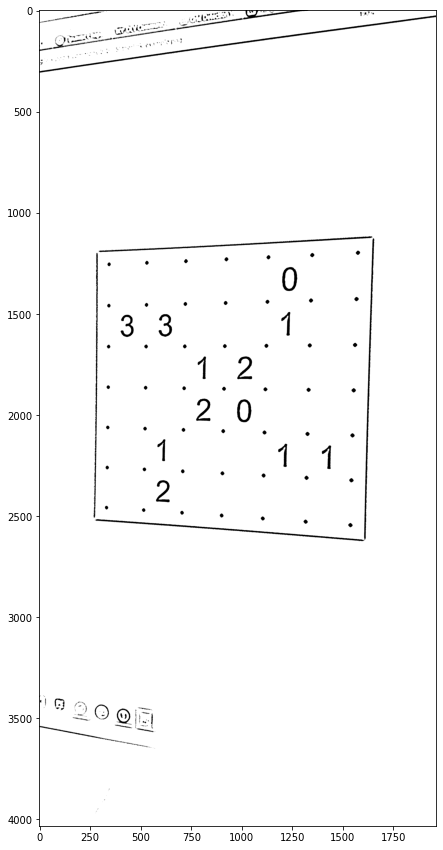

In [14]:
thresh = cv2.adaptiveThreshold(blurred, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
print_img(thresh)

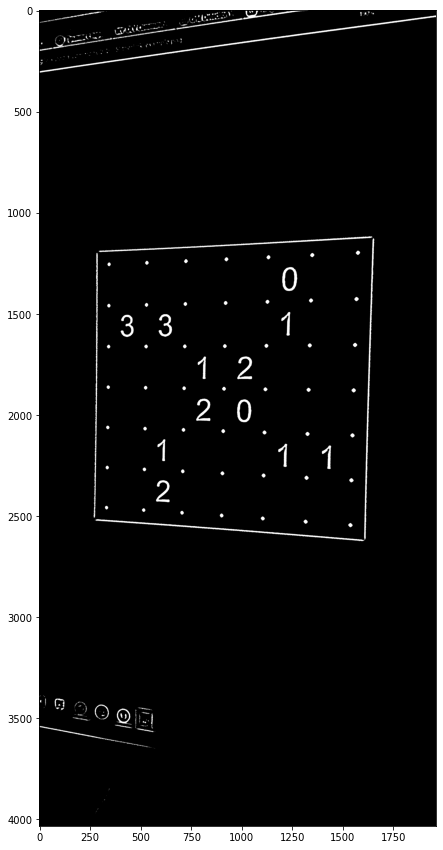

In [15]:
thresh = cv2.bitwise_not(thresh)
print_img(thresh)

In [16]:
cv2.dilate?

Docstring:
dilate(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst
.   @brief Dilates an image by using a specific structuring element.
.   
.   The function dilates the source image using the specified structuring element that determines the
.   shape of a pixel neighborhood over which the maximum is taken:
.   \f[\texttt{dst} (x,y) =  \max _{(x',y'):  \, \texttt{element} (x',y') \ne0 } \texttt{src} (x+x',y+y')\f]
.   
.   The function supports the in-place mode. Dilation can be applied several ( iterations ) times. In
.   case of multi-channel images, each channel is processed independently.
.   
.   @param src input image; the number of channels can be arbitrary, but the depth should be one of
.   CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
.   @param dst output image of the same size and type as src.
.   @param kernel structuring element used for dilation; if elemenat=Mat(), a 3 x 3 rectangular
.   structuring element is used. Kernel can be created using

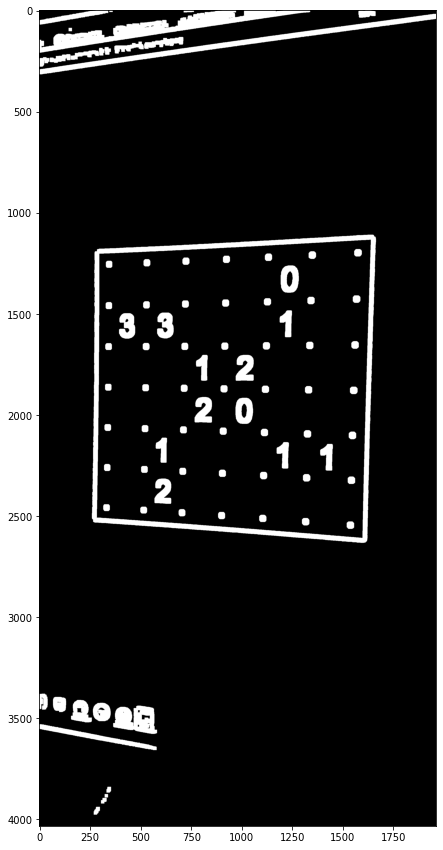

In [17]:
dilated = cv2.dilate(thresh, kernel = np.ones((5,5),np.uint8), iterations=4)
print_img(dilated)

In [18]:
cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)


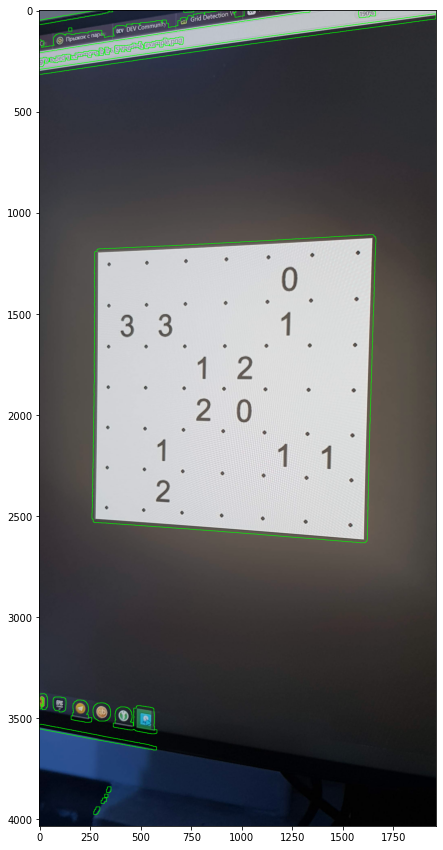

In [19]:
all_contours = im.copy()
cv2.drawContours(all_contours, cnts, -1, (0, 255, 0), 2)
print_img(all_contours)

In [20]:
# initialize a contour that corresponds to the puzzle outline
puzzleCnt = []
# loop over the contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    # if our approximated contour has four points, then we can
    # assume we have found the outline of the puzzle
    if len(approx) == 4:
        puzzleCnt.append(approx)
        break

In [21]:
len(puzzleCnt)

1

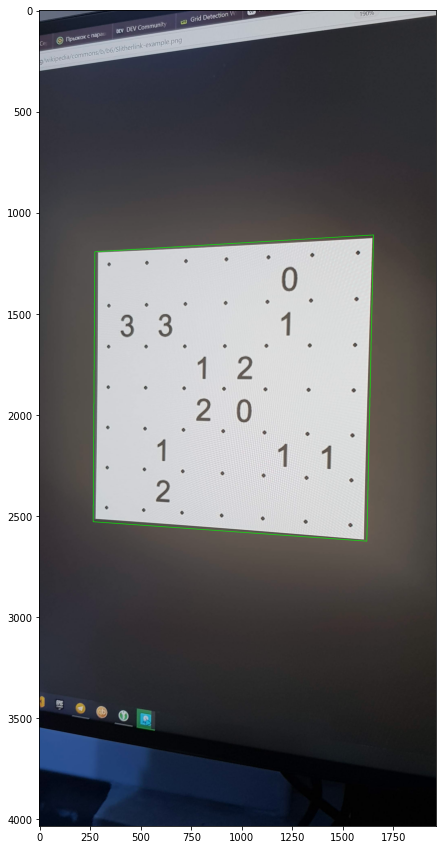

In [22]:
output = im.copy()
cv2.drawContours(output, puzzleCnt, -1, (0, 255, 0), 2)
print_img(output)

In [23]:
def crop_img(img, scale=1.0):
    center_x, center_y = img.shape[1] / 2, img.shape[0] / 2
    width_scaled, height_scaled = img.shape[1] * scale, img.shape[0] * scale
    left_x, right_x = center_x - width_scaled / 2, center_x + width_scaled / 2
    top_y, bottom_y = center_y - height_scaled / 2, center_y + height_scaled / 2
    img_cropped = img[int(top_y):int(bottom_y), int(left_x):int(right_x)]
    return img_cropped

In [24]:
puzzle = four_point_transform(im, puzzleCnt[0].reshape(4, 2))
warped = four_point_transform(gray, puzzleCnt[0].reshape(4, 2))

puzzle = crop_img(puzzle, 0.97)
warped = crop_img(warped, 0.97)

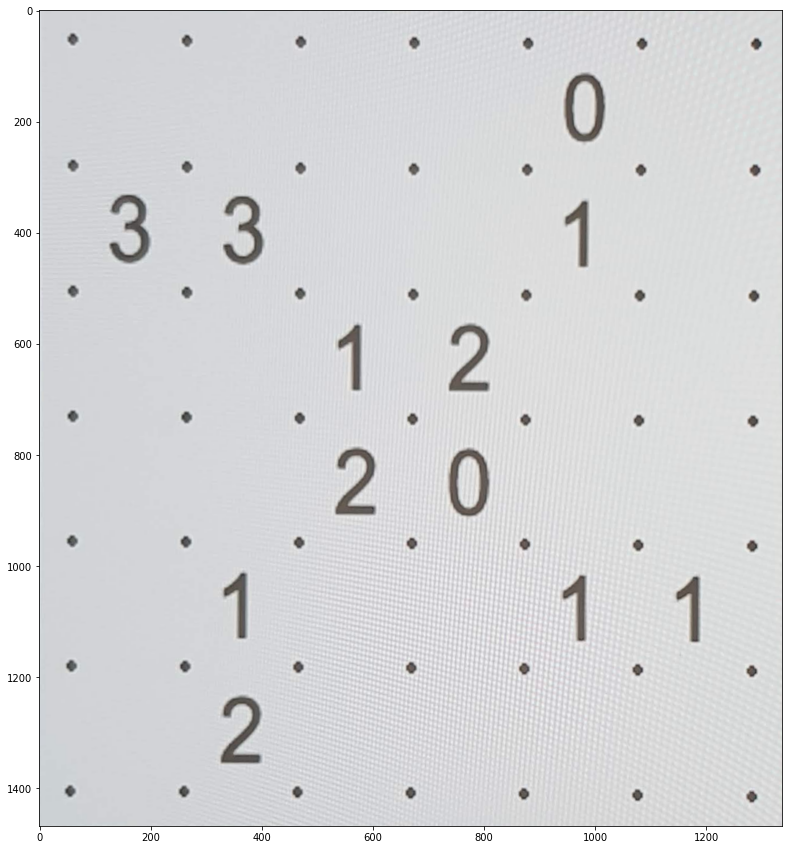

In [25]:
print_img(puzzle)

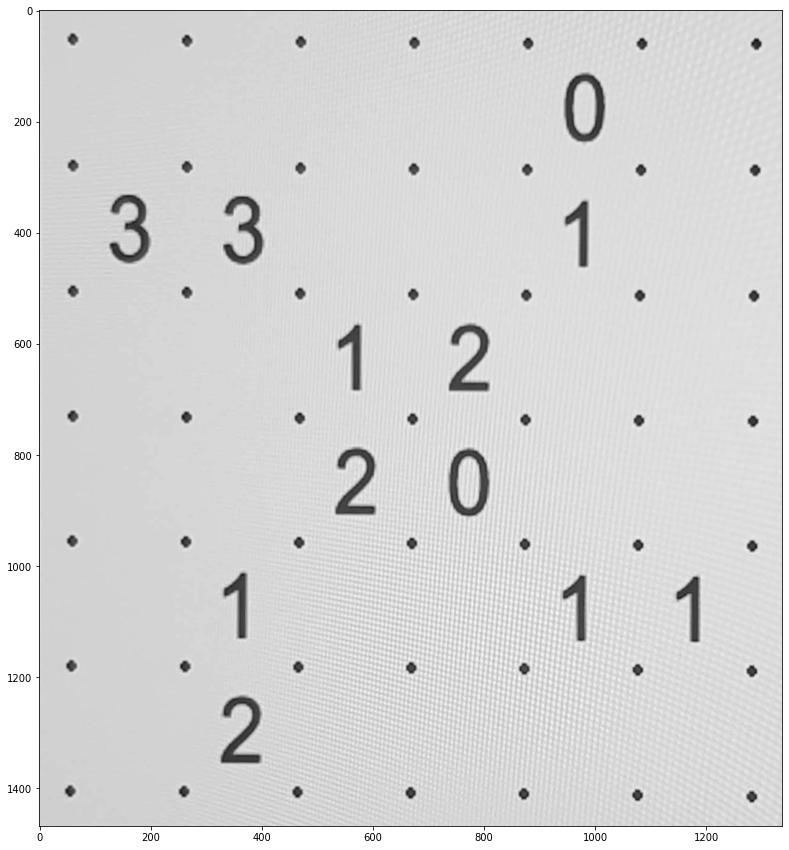

In [26]:
print_img(warped)

In [27]:
warped.shape

(1468, 1337)

In [28]:
w, h = warped.shape
cell_w, cell_h = int(w / 6), int(h / 6)

In [29]:
min_size = int(cell_w * cell_h * 0.2)

0 4


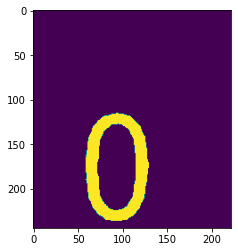

1 0


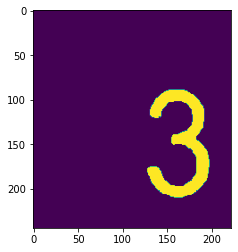

1 1


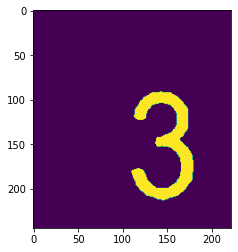

1 4


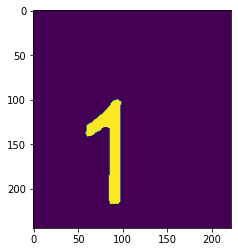

2 2


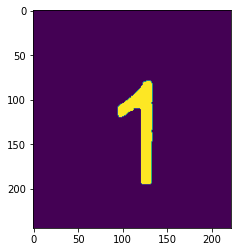

2 3


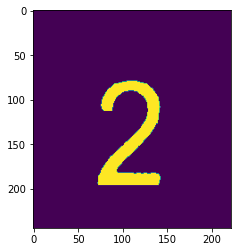

3 2


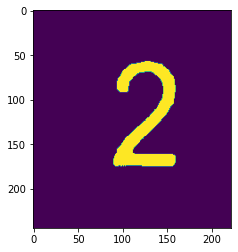

3 3


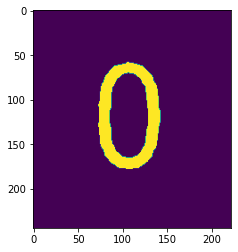

4 1


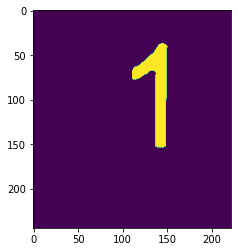

4 4


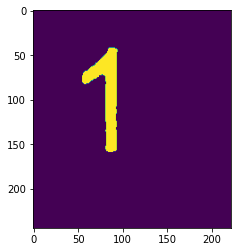

4 5


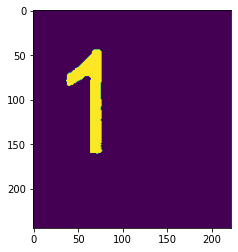

5 1


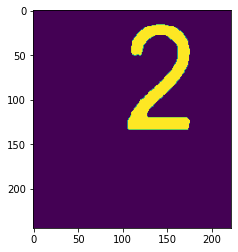

In [30]:
indices = []
for i in range(6):
    for j in range(6):
        sub_img = warped[cell_w * i :cell_w * (i + 1), cell_h * j: cell_h * (j + 1)]
#         plt.imshow()
        cleaned = remove_small_objects(~(sub_img > 128), min_size=(cell_w * cell_h * 0.01))
#         cleaned = sub_img > 128
#         cleaned = clear_border(cleaned)
        if np.sum(cleaned) > 0:
            print(i,j)
            plt.imshow(cleaned)
            plt.show()
            indices.append((i,j))

In [31]:
# Model / data parameters
num_classes = 4
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")





# convert class vectors to binary class matrices


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [32]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [33]:
def reduce_to_4_classes(x, y):
    res_x, res_y = [], []
    for x, y in zip(x, y):
        if y < 4:
            res_x.append(x)
            res_y.append(y)
    return np.array(res_x), np.array(res_y)
x_train, y_train = reduce_to_4_classes(x_train, y_train)
x_test, y_test = reduce_to_4_classes(x_test, y_test)

In [34]:
y_train = keras.utils.to_categorical(y_train, 4)
y_test = keras.utils.to_categorical(y_test, 4)

In [79]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
#     brightness_range=(0.8, 1.4),
    zoom_range=(0.8, 1.6),
    shear_range=0.3,
    fill_mode='nearest',
    validation_split=0.1,
#     horizontal_flip=True
)

In [80]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                

In [81]:
# if os.path.exists('model.hd5'):
#     model = keras.models.load_model('model.hd5')

In [82]:

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [83]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", f1_m])

In [84]:
batch_size = 8
epochs = 60



model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), validation_data=(x_test, y_test), epochs=epochs,
          callbacks=[keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    mode="auto",
    restore_best_weights=True,)]
)



Epoch 1/60
3095/3095 [==============================] - 12s 4ms/step - loss: 0.3597 - accuracy: 0.8635 - f1_m: 0.8479 - val_loss: 0.0377 - val_accuracy: 0.9899 - val_f1_m: 0.9900
Epoch 2/60
3095/3095 [==============================] - 11s 3ms/step - loss: 0.1582 - accuracy: 0.9474 - f1_m: 0.9473 - val_loss: 0.0481 - val_accuracy: 0.9865 - val_f1_m: 0.9869
Epoch 3/60
3095/3095 [==============================] - 11s 3ms/step - loss: 0.1243 - accuracy: 0.9602 - f1_m: 0.9604 - val_loss: 0.0304 - val_accuracy: 0.9909 - val_f1_m: 0.9912
Epoch 4/60
3095/3095 [==============================] - 11s 3ms/step - loss: 0.1040 - accuracy: 0.9657 - f1_m: 0.9660 - val_loss: 0.0439 - val_accuracy: 0.9846 - val_f1_m: 0.9852
Epoch 5/60
3095/3095 [==============================] - 12s 4ms/step - loss: 0.0939 - accuracy: 0.9685 - f1_m: 0.9686 - val_loss: 0.0693 - val_accuracy: 0.9827 - val_f1_m: 0.9830
Epoch 6/60
3095/3095 [==============================] - 14s 4ms/step - loss: 0.0864 - accuracy: 0.9714 - 

In [85]:
from scipy.ndimage.measurements import center_of_mass

In [86]:
def translate_to_com(im, com):
    x_trans = int(im.shape[0]//2-com[0])
    y_trans = int(im.shape[1]//2-com[1])

    # Pad and remove pixels from image to perform translation

    if x_trans > 0:
        im2 = np.pad(im, ((x_trans, 0), (0, 0)), mode='constant')
        im2 = im2[:im.shape[0]-x_trans, :]
    else:
        im2 = np.pad(im, ((0, -x_trans), (0, 0)), mode='constant')
        im2 = im2[-x_trans:, :]

    if y_trans > 0:
        im3 = np.pad(im2, ((0, 0), (y_trans, 0)), mode='constant')
        im3 = im3[:, :im.shape[0]-y_trans]

    else:
        im3 = np.pad(im2, ((0, 0), (0, -y_trans)), mode='constant')
        im3 = im3[:, -y_trans:]
        
    return im3


Prediction ((0, 4)): 0 (0.9998646974563599)


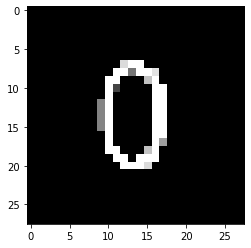

Prediction ((1, 0)): 3 (0.9999978542327881)


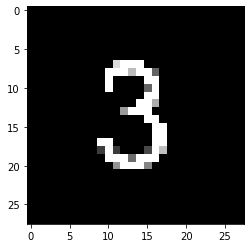

Prediction ((1, 1)): 3 (0.9999915361404419)


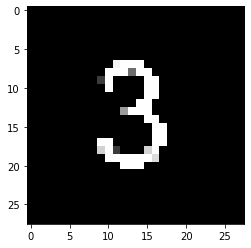

Prediction ((1, 4)): 1 (0.9933358430862427)


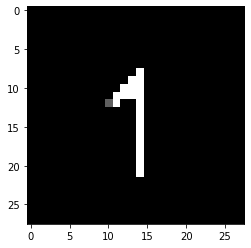

Prediction ((2, 2)): 1 (0.9915980100631714)


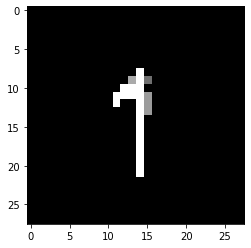

Prediction ((2, 3)): 2 (0.9999909400939941)


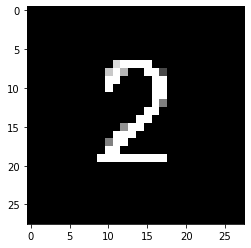

Prediction ((3, 2)): 2 (0.999950647354126)


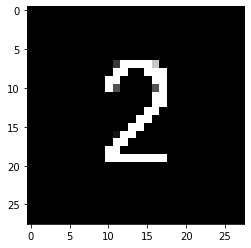

Prediction ((3, 3)): 0 (0.9996639490127563)


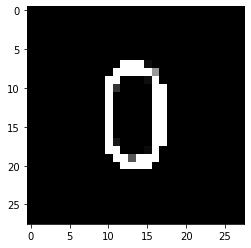

Prediction ((4, 1)): 1 (0.986348032951355)


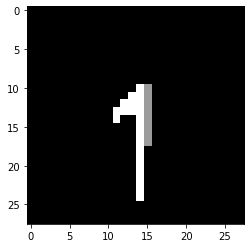

Prediction ((4, 4)): 1 (0.9996521472930908)


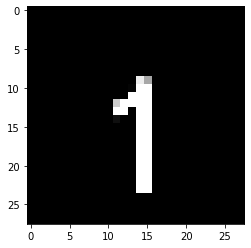

Prediction ((4, 5)): 1 (0.9987900853157043)


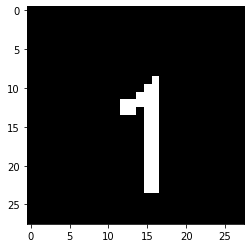

Prediction ((5, 1)): 2 (0.9999996423721313)


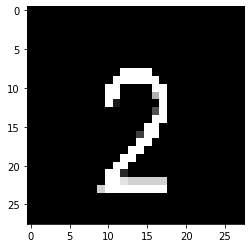

In [89]:
for i, j in indices:
#     offset_x = 30
#     offset_y = -10
    offset_x = 0
    offset_y = 0
    sub_img = warped[offset_x + cell_w * i: offset_x + cell_w * (i +1), offset_y + cell_h * j: offset_y + cell_h * (j + 1)]
#     print_img(sub_img, figsize=None)
#     plt.show()
    sub_img = cv2.GaussianBlur(sub_img, (11, 11), 2)
    sub_img = ~(sub_img > 128)
#     print_img(sub_img, figsize=None)
    sub_img = remove_small_objects(sub_img, min_size=(cell_w * cell_h * 0.01)) * 255
#     print_img(sub_img, figsize=None)
    com = center_of_mass(sub_img)
    sub_img = translate_to_com(sub_img, com)
    sub_img = cv2.resize(sub_img.astype(np.uint8), dsize=(28,28))
    
#     print_img(sub_img, figsize=None)
    sub_img = sub_img.reshape(input_shape)
    print_img(sub_img / 255., figsize=None)
    pred_vector = model.predict(np.array([sub_img > 0]))[0]
    prediction = np.argmax(pred_vector)
    print(f'Prediction ({i,j}): {prediction} ({pred_vector[prediction]})')
    plt.show()

In [88]:
model.save_weights('model.hd5')

1


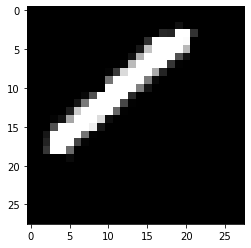

1


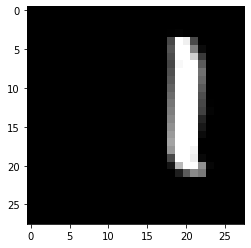

0


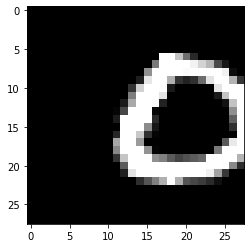

3


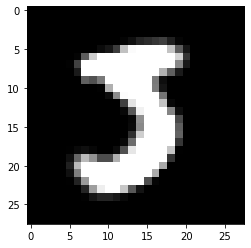

0


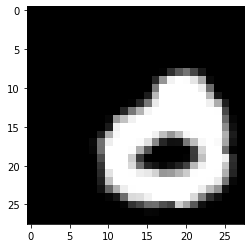

0


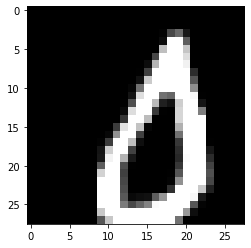

1


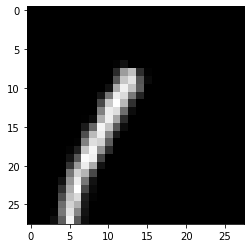

0


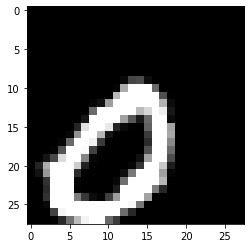

3


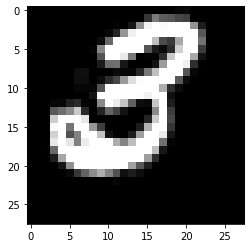

2


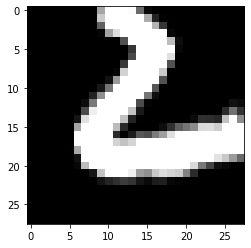

2


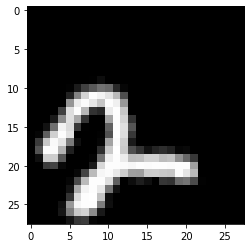

1


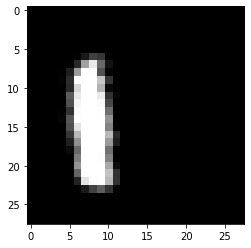

3


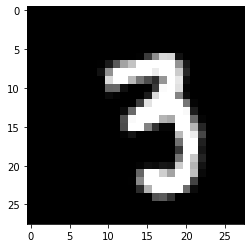

2


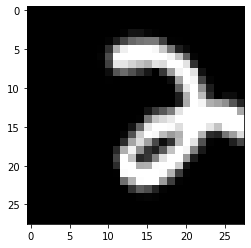

0


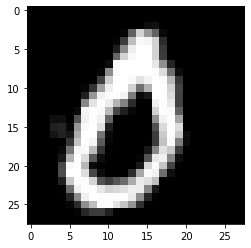

0


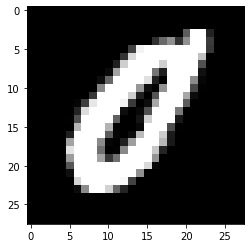

3


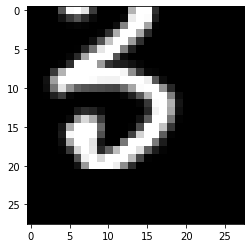

2


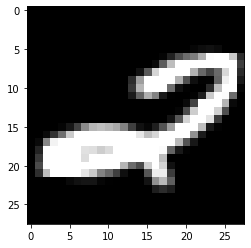

0


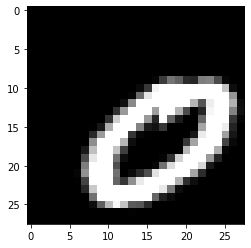

3


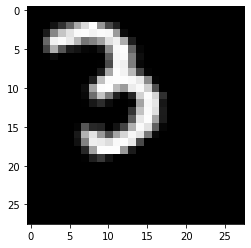

3


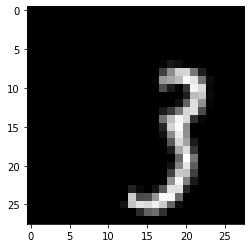

2


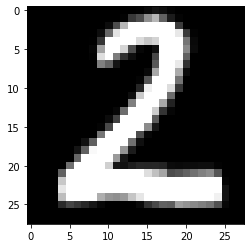

1


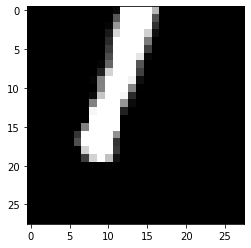

1


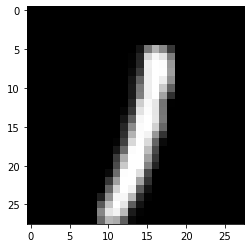

2


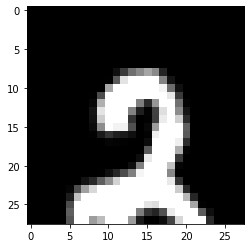

1


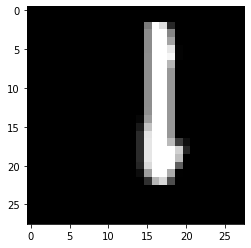

0


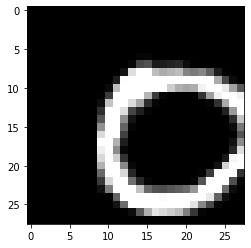

3


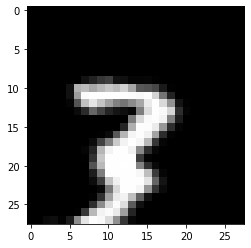

3


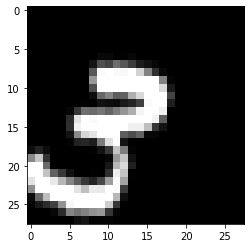

3


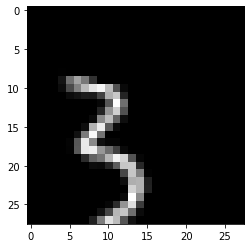

In [48]:
for i in range(30):
    b_x, b_y = next(datagen.flow(x_train, y_train, batch_size=1))
    print(np.argmax(b_y[0]))
    print_img(b_x[0], figsize=None)
    plt.show()